<a href="https://colab.research.google.com/github/AlbertCoding42/AI-Projects/blob/main/GermanCreditData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Overview: Credit Risk Analysis Using German Credit Data

### Objective

The primary goal of this project is to analyze and predict credit risk using the Statlog German Credit Data. This dataset includes various attributes of individuals, which we will use to classify them as either good or bad credit risks. The project aims to explore, preprocess, and model this data using machine learning techniques to make informed predictions about credit risk.

### Goal

The end goal is to develop a predictive model that can effectively distinguish between good and bad credit risks, thereby providing valuable insights for credit decision-making processes. This project will also serve as a showcase of applying data science techniques in a practical, real-world scenario.


## Section 1: Data Loading and Preprocessing

In this section, we perform the initial steps necessary for any data analysis and modeling process:

1. **Import Libraries**: Essential Python libraries are imported for data manipulation, visualization, and machine learning modeling.
2. **Load Dataset**: The German Credit Data is loaded from a file. This dataset contains information about individuals and their credit risk.
3. **Feature-Target Separation**: The dataset is divided into features (`X`) and the target variable (`y`). The target variable is the credit risk classification.
4. **Normalisation of Features**: The features are normalised using `StandardScaler`. This is a crucial step as it standardises the range of the features, making the data suitable for models that are sensitive to the scale of the data.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset (Replace 'data.csv' with your dataset path)
data = pd.read_csv('german.data-numeric', header=None, delim_whitespace=True)

# Separating features and target variable
X = data.drop(columns=[24])  # Assuming last column is the target
y = data[24]

# Normalising the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

## Section 2: Visualisation of Key Features

In this section, we focus on visualizing the distribution of selected key features:

1. **Selection of Key Features**: A subset of features is chosen for visualisation. This helps in understanding their distribution and initial insights about the data.
2. **Histograms**: For each selected feature, a histogram is plotted. Histograms provide a clear view of the distribution of feature values, highlighting aspects like skewness, central tendency, and spread.


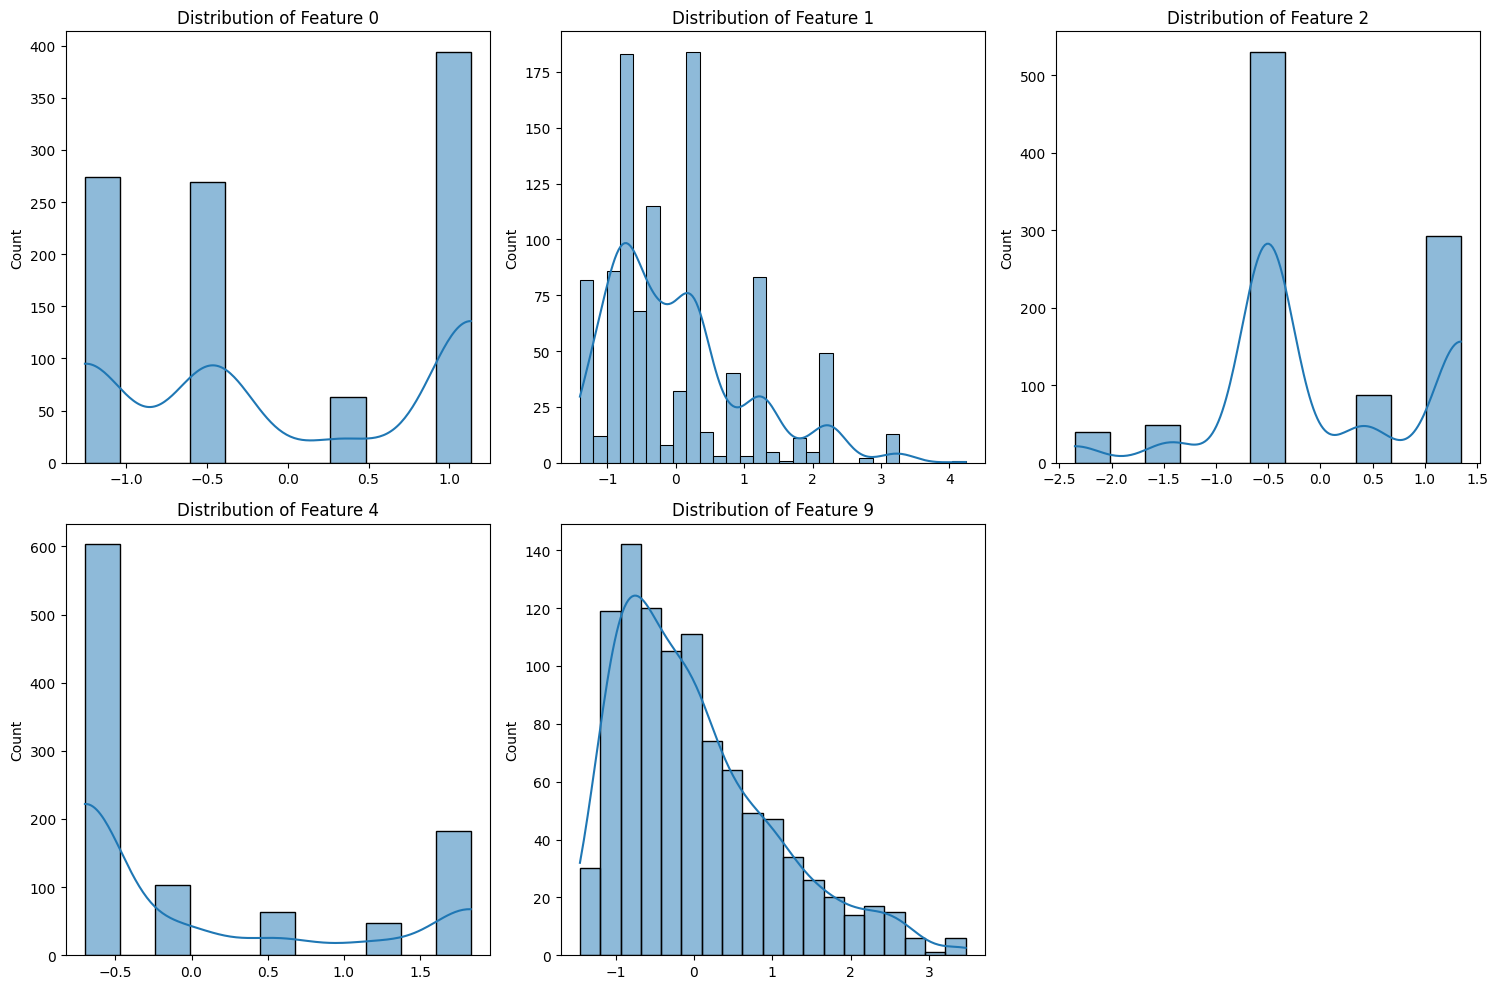

In [ ]:
# Visualizing the distribution of some key features
selected_features = [0, 1, 2, 4, 9]  # Example features for visualization
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_normalized[:, feature], kde=True)
    plt.title(f'Distribution of Feature {feature}')
plt.tight_layout()
plt.show()

## Section 3: Checking for Multicollinearity

This section is dedicated to examining the relationships between features:

1. **Correlation Matrix Visualisation**: We use a heatmap to visualise the correlation matrix of the features.
2. **Purpose**: The correlation matrix helps in identifying multicollinearity, where features are highly correlated with each other. Multicollinearity can impact the performance and interpretability of certain machine learning models, especially linear models.

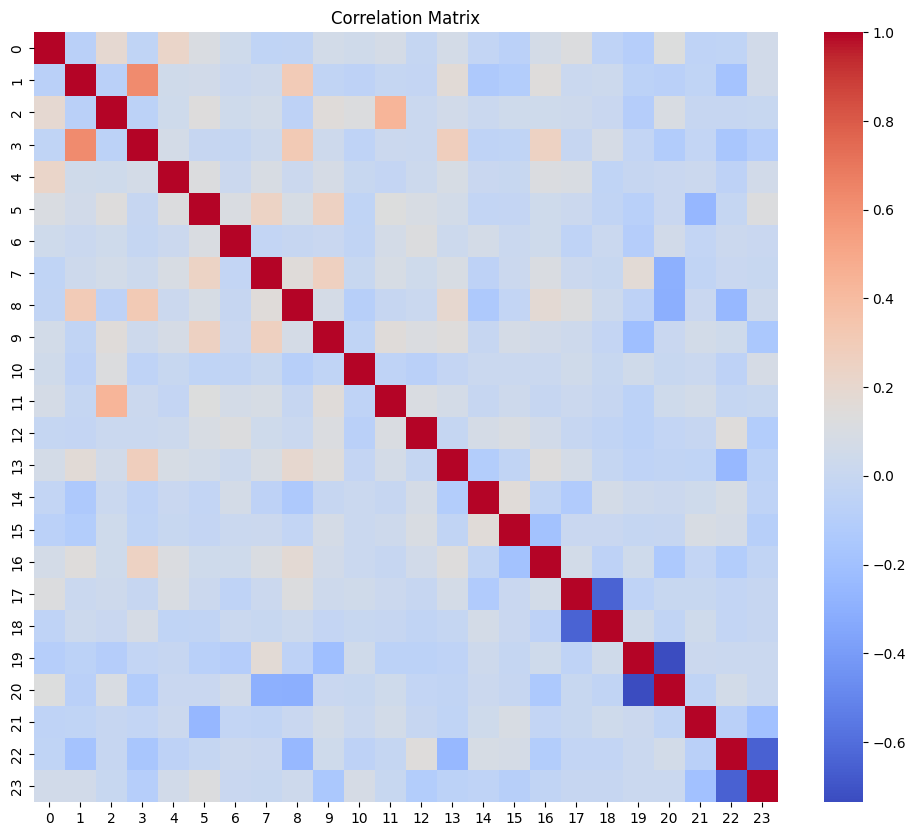

In [ ]:
# Checking for multicollinearity with a correlation matrix
correlation_matrix = pd.DataFrame(X_normalized, columns=X.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Section 4: Model Training and Evaluation

Here, we train and evaluate two machine learning models for classification:

1. **Train-Test Split**: The data is split into training and testing sets. This is essential for evaluating the model on unseen data.
2. **Model Training**: We train two models - Logistic Regression and Random Forest. These models are chosen for their suitability for classification tasks.
3. **Model Evaluation**: After training, we evaluate the models using the classification report, which provides metrics like precision, recall, and f1-score. This helps in assessing the performance of the models in predicting credit risk.


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Random Forest Model
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest_pred = rand_forest.predict(X_test)

# Evaluating the models
log_reg_report = classification_report(y_test, log_reg_pred)
rand_forest_report = classification_report(y_test, rand_forest_pred)

print("Logistic Regression Classification Report:\n", log_reg_report)
print("\nRandom Forest Classification Report:\n", rand_forest_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.90      0.84       209
           2       0.66      0.45      0.54        91

    accuracy                           0.76       300
   macro avg       0.73      0.68      0.69       300
weighted avg       0.75      0.76      0.75       300


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.93      0.85       209
           2       0.72      0.42      0.53        91

    accuracy                           0.77       300
   macro avg       0.75      0.67      0.69       300
weighted avg       0.76      0.77      0.75       300



## Section 5: Feature Importance Analysis

In this final section, we focus on understanding the importance of different features:

1. **Feature Importance from Random Forest**: The feature importances are extracted from the trained Random Forest model.
2. **Visualisation**: A bar plot is used to visualise the importance of each feature.
3. **Purpose**: Understanding feature importance helps in identifying which features are most influential in predicting credit risk, guiding future feature selection and model refinement.

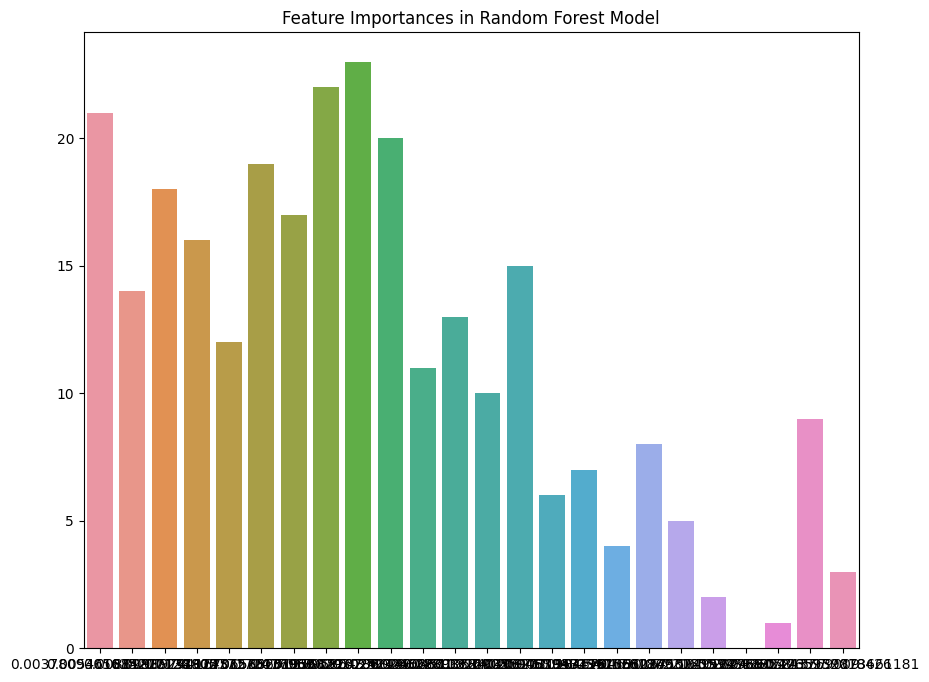

In [ ]:
# Feature Importance from Random Forest
feature_importances = rand_forest.feature_importances_
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances in Random Forest Model')
plt.show()

## Summary of Feature Observations and Refinement Strategy

### Observations from Box Plots and Histograms:

Through detailed analysis of the box plots and histograms for each feature, several key observations were made:

1. **Variability Between Classes**: Some features exhibited significant differences in their distributions when comparing the two credit risk categories (good vs. bad credit risk). These features are potentially more informative for predicting credit risk.

2. **Non-Informative Features**: Several features showed similar distributions across both credit risk categories or displayed limited variability. Such features are less likely to contribute meaningfully to the predictive power of our models.

3. **Outliers**: Outliers were observed in numerous features. While they can sometimes provide valuable insights, they can also skew the results and affect model performance.

4. **Categorical Features**: Certain features are categorical in nature. The analysis of these features focused on their distribution across the different categories and their potential impact on credit risk prediction.

### Feature Refinement Strategy:

Based on these observations, the following feature refinement strategy has been devised:

1. **Exclude Non-Informative Features**: Features that do not vary significantly between credit risk categories or do not contribute to the model's predictive power will be excluded. This will help in simplifying the model and potentially improving its performance.

2. **Handle Outliers in Non-Categorical Features**: Outliers in non-categorical features will be handled appropriately. This may involve capping or transforming these outliers to reduce their impact on the model.

3. **Re-encode Categorical Features**: Categorical features will be re-evaluated to ensure they are encoded effectively for model training. Features that are found to be non-informative, even if categorical, may be excluded.

4. **Focus on Informative Features**: Special attention will be paid to features that have shown significant variability between the credit risk categories. These features are likely to be more predictive and therefore will be prioritized in the refined model.

### Conclusion:

This feature refinement is expected to enhance the model's ability to distinguish between good and bad credit risks, leading to more accurate and reliable predictions. The effectiveness of this refinement will be assessed through retraining and evaluating the models with the updated feature set.
